In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

About Dataset

General Information:

This dataset contains NDVI (Normalized Difference Vegetation Index) data from Ukraine from Jan 2018-Jan 2023 (5 years of data). These NDVI readings were collected from the Sentinel-2 satellite constellation and compiled using the Sentinel Hub EO Browser.

NDVI readings range from -1 to 1. A reading <0 indicates areas of water, cloud cover, or manmade structures. In this dataset, a negative reading most likely signifies cloud cover as the area of interest encompasses the entirety of Ukraine. A reading >0 but close to 0 signifies barren land with little vegetation, while readings >0 and closer to 1 signify dense green vegetation.

The dataset includes both mean NDVI readings and other information related to the index. The data was collected from multiple NDVI scans every day from Jan 31, 2018 - Jan 31, 2023, ~1800 days of data total. for the day total.

In [2]:
df=pd.read_csv('input/NDVI_Data.csv', delimiter=",")

# df

In [3]:
cols = df.columns
cols

Index(['C0/date', 'C0/min', 'C0/max', 'C0/mean', 'C0/stDev', 'C0/sampleCount',
       'C0/noDataCount', 'C0/median', 'C0/p10', 'C0/p90',
       'C0/cloudCoveragePercent'],
      dtype='object')

In [8]:
df = df.drop('C0/sampleCount', axis =1)
df = df.drop('C0/noDataCount', axis =1)

In [9]:
df.describe()

,C0/min,C0/max,C0/mean,C0/stDev,C0/median,C0/p10,C0/p90,C0/cloudCoveragePercent
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,-0.950117,0.987597,0.214674,0.197165,0.186851,0.015762,0.465456,55.778442
std,0.187938,0.087665,0.173671,0.089860,0.200885,0.066226,0.289082,30.060125
min,-1.000000,0.026870,-0.037997,0.008492,-0.045828,-0.128028,-0.009788,0.008442
25%,-1.000000,1.000000,0.058274,0.130201,0.019305,-0.016274,0.189300,30.673968
50%,-1.000000,1.000000,0.177635,0.208481,0.094924,-0.001887,0.492586,58.022855
75%,-1.000000,1.000000,0.348723,0.271059,0.328557,0.016268,0.741053,83.685062
max,-0.019051,1.000000,0.729104,0.368627,0.780726,0.468949,0.912671,99.994920


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   C0/date                  1828 non-null   object 
 1   C0/min                   1828 non-null   float64
 2   C0/max                   1828 non-null   float64
 3   C0/mean                  1828 non-null   float64
 4   C0/stDev                 1828 non-null   float64
 5   C0/median                1828 non-null   float64
 6   C0/p10                   1828 non-null   float64
 7   C0/p90                   1828 non-null   float64
 8   C0/cloudCoveragePercent  1828 non-null   float64
dtypes: float64(8), object(1)
memory usage: 128.7+ KB


In [11]:
df.isnull().sum()

C0/date                    0
C0/min                     0
C0/max                     0
C0/mean                    0
C0/stDev                   0
C0/median                  0
C0/p10                     0
C0/p90                     0
C0/cloudCoveragePercent    0
dtype: int64

In [12]:
df.duplicated().sum()

5

In [13]:
df= df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

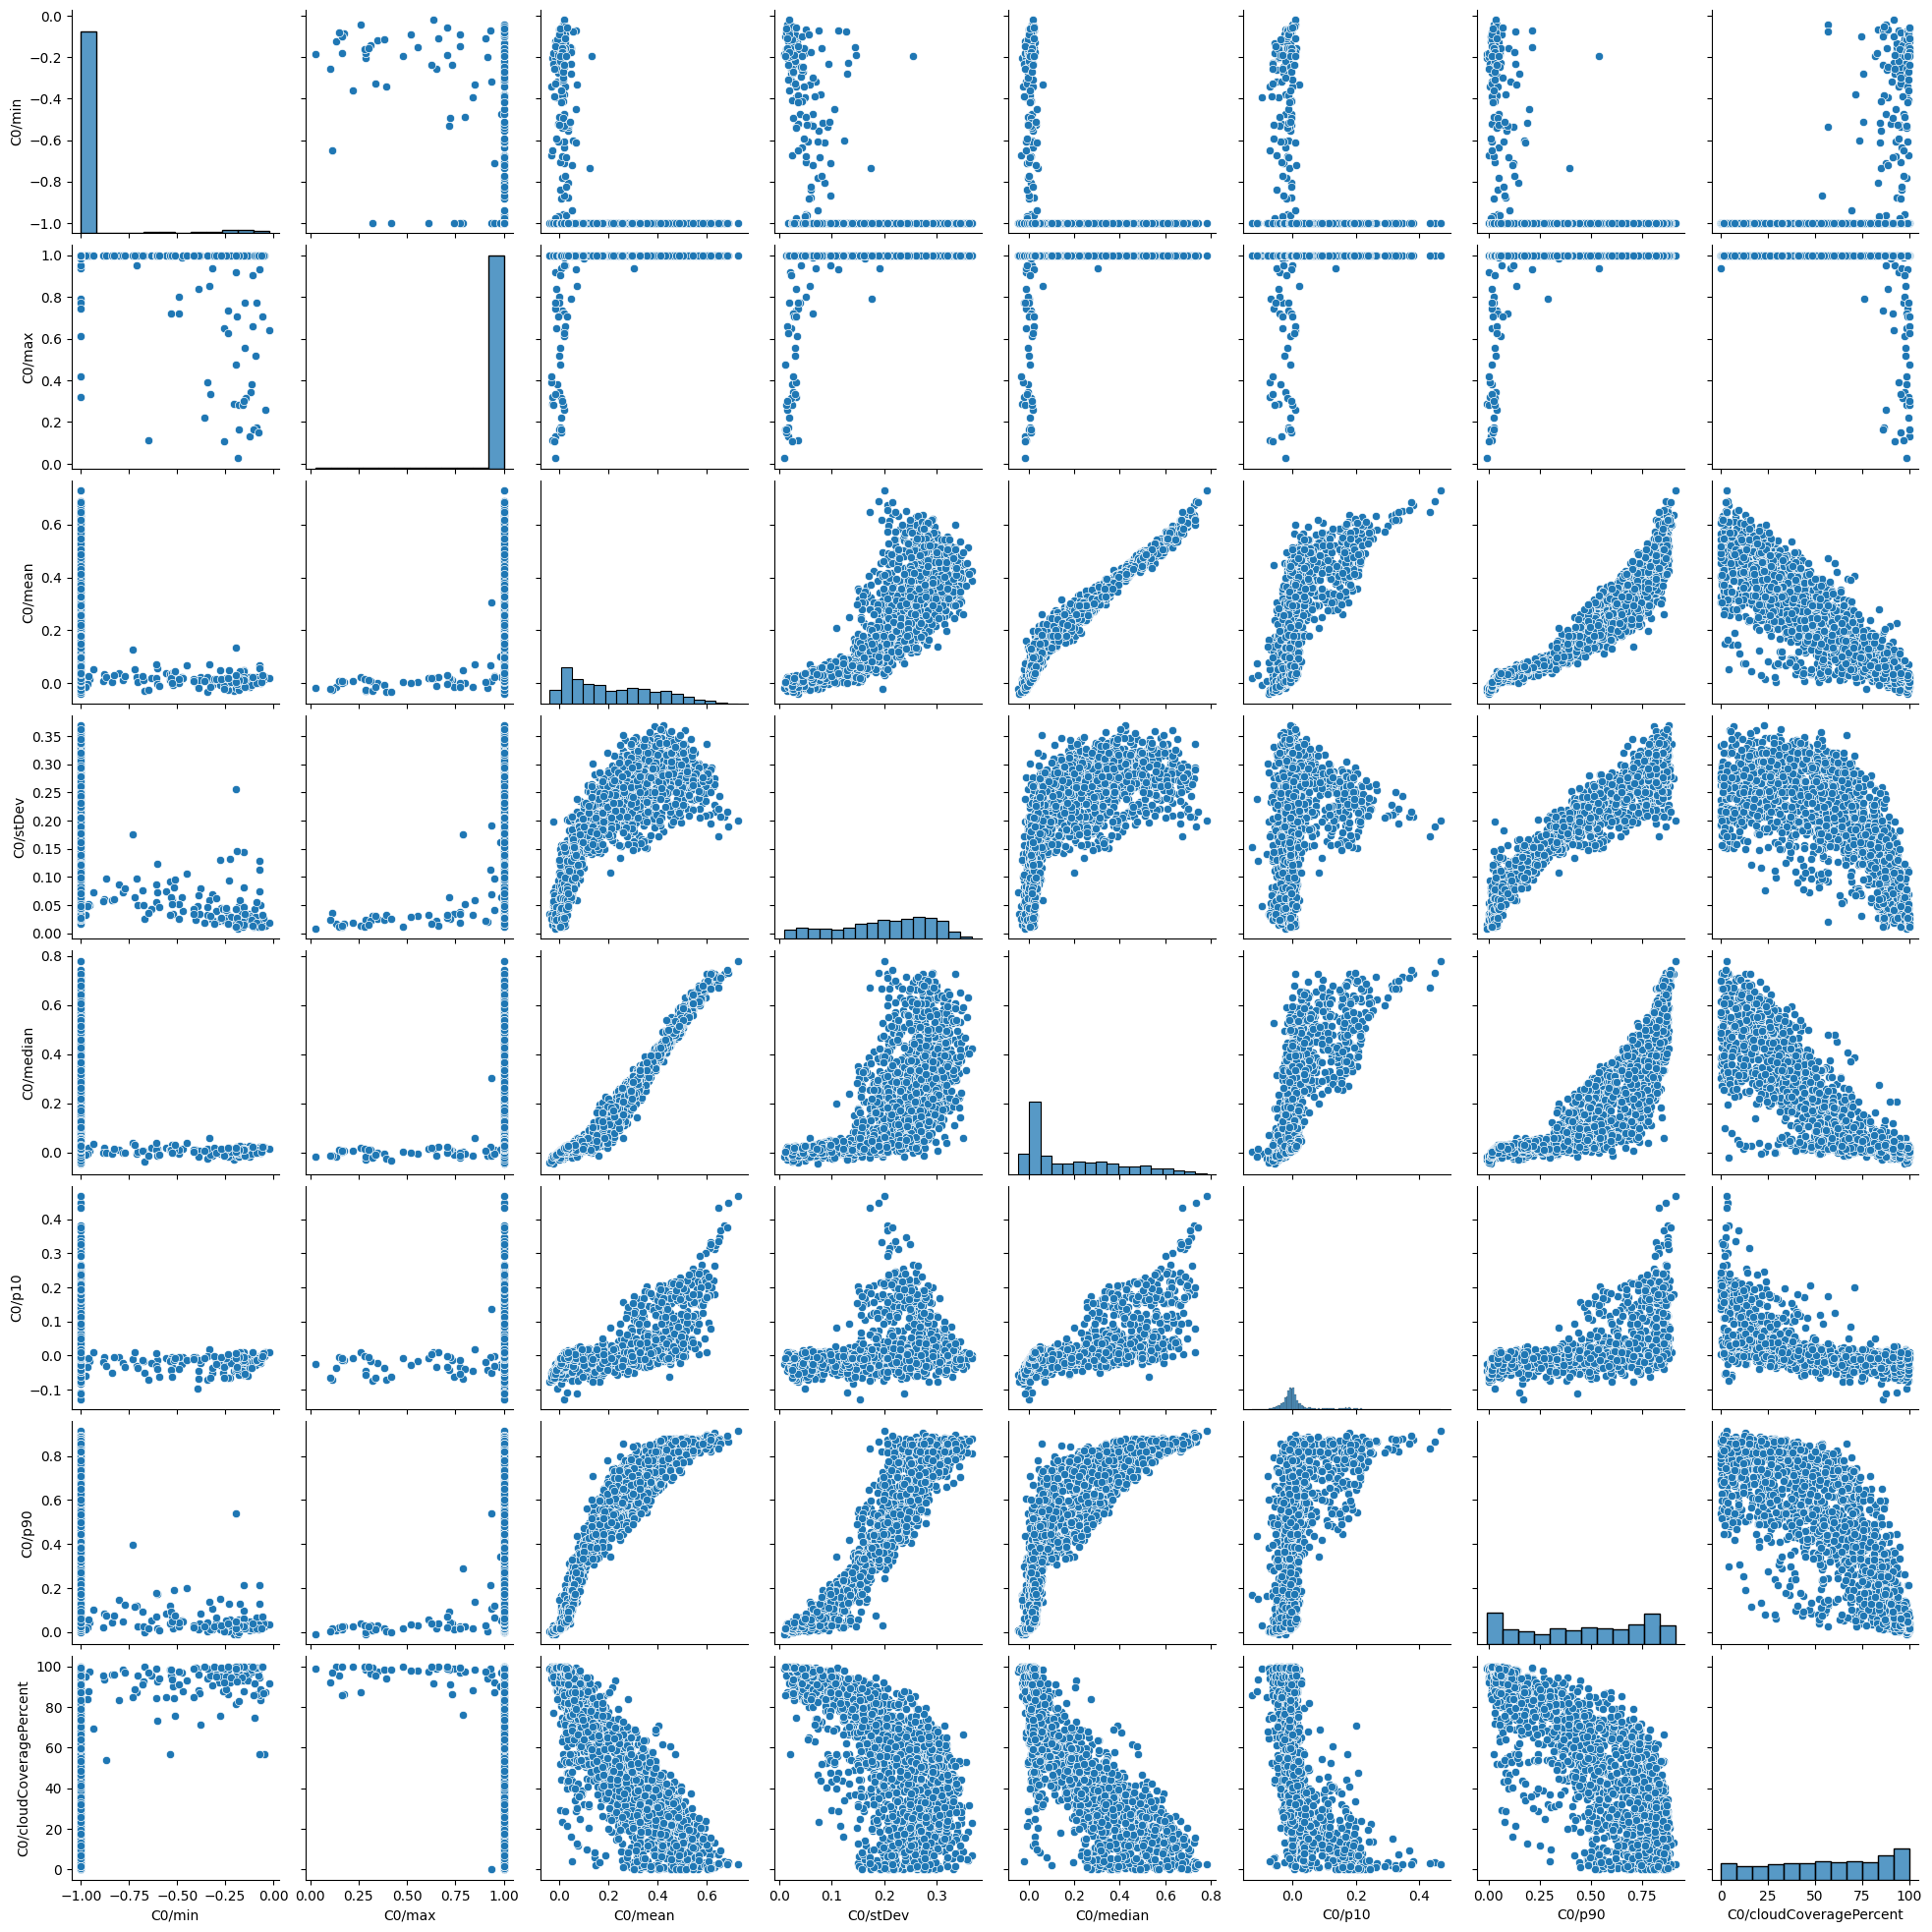

In [15]:
sns.pairplot(df)

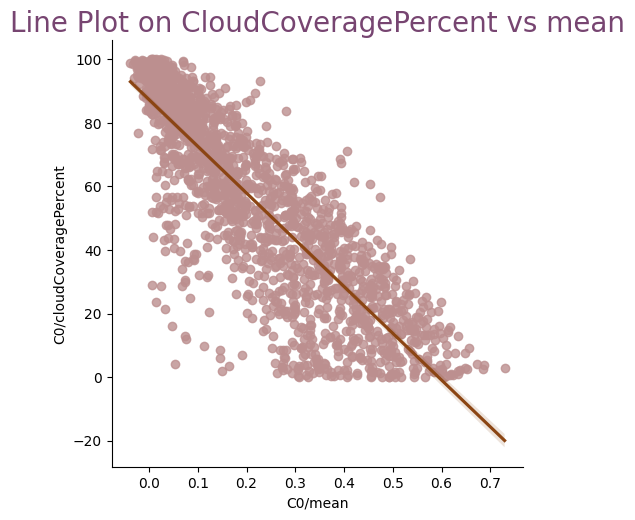

In [16]:
lm = sns.lmplot(x="C0/mean", y="C0/cloudCoveragePercent", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on CloudCoveragePercent vs mean", color="#774571", fontsize = 20)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2b64907c3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b64a174f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b64a151010>],
 'medians': [<matplotlib.lines.Line2D at 0x2b64a1753d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b64a1756d0>],
 'means': []}

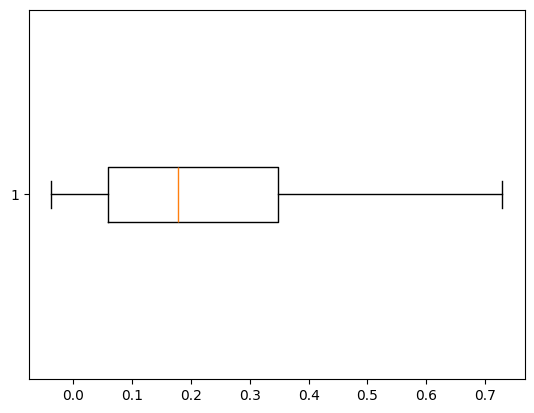

In [17]:
plt.boxplot(df['C0/mean'], vert = 0)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b64a1d2960>,
 'caps': [<matplotlib.lines.Line2D at 0x2b64a1d2d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b64a1d26f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b64a1d3350>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b64a1d3650>],
 'means': []}

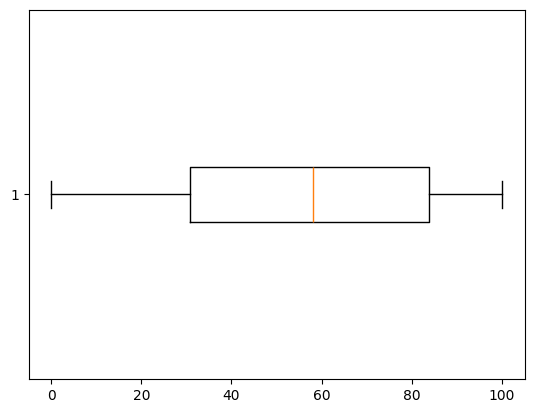

In [18]:
plt.boxplot(df['C0/cloudCoveragePercent'], vert = 0)

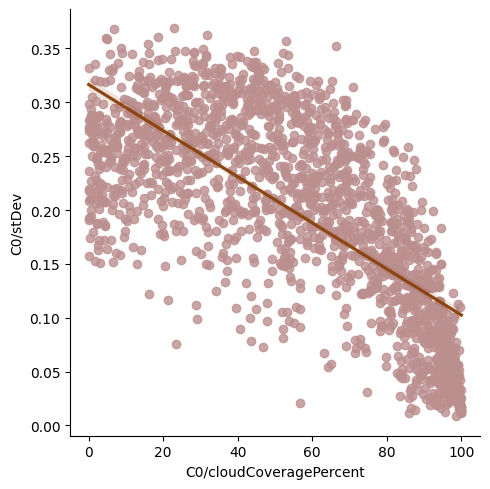

In [19]:
lm = sns.lmplot(x="C0/cloudCoveragePercent", y="C0/stDev", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.show()

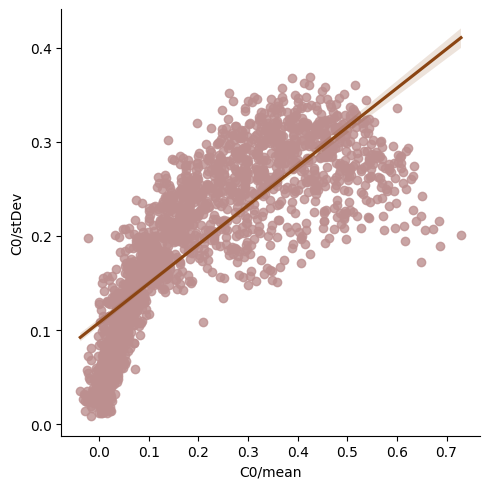

In [20]:
lm = sns.lmplot(x="C0/mean", y="C0/stDev", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.show()

In [21]:
df.columns

Index(['C0/date', 'C0/min', 'C0/max', 'C0/mean', 'C0/stDev', 'C0/median',
       'C0/p10', 'C0/p90', 'C0/cloudCoveragePercent'],
      dtype='object')

In [22]:
df = df.drop(columns=['C0/date'])
df.columns

Index(['C0/min', 'C0/max', 'C0/mean', 'C0/stDev', 'C0/median', 'C0/p10',
       'C0/p90', 'C0/cloudCoveragePercent'],
      dtype='object')

<Axes: >

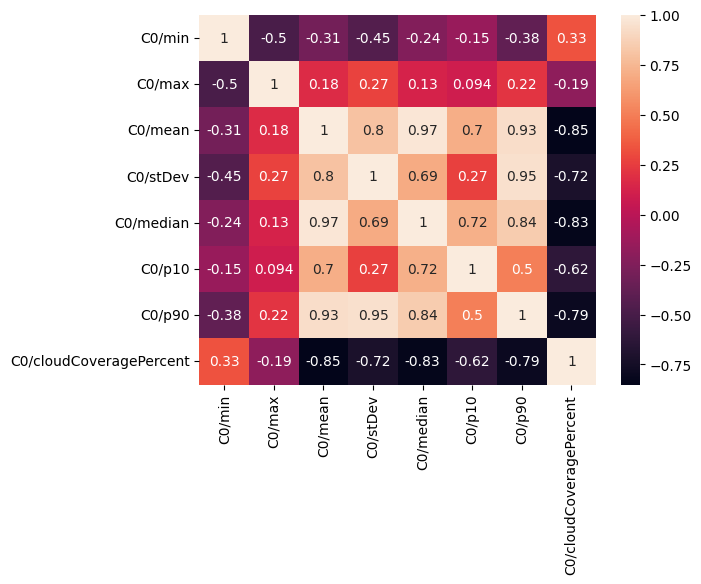

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
df = df.sample(frac=1)
X= df["C0/mean"]
X

1040    0.059931
1192    0.126590
25      0.051772
173     0.199152
1228    0.362620
          ...   
834     0.189921
519     0.481591
330     0.011660
602     0.171827
1591    0.482705
Name: C0/mean, Length: 1823, dtype: float64

In [25]:
X = df['C0/mean']
y = -df['C0/cloudCoveragePercent']
X_train = X.iloc[:int(0.8*len(X))]
X_test = X.iloc[int(0.8*len(X)):]
Y_train = y.iloc[:int(0.8*len(y))]
Y_test = y.iloc[int(0.8*len(y)):]


In [26]:
def MSE(x,y, m, c):
    """Computes the Mean Square Error."""
    total_err = 0
    
    for i in range(len(x)):
        total_err += (y.iloc[i] - (m * x.iloc[i] + c)) ** 2
    return total_err / len(x)

In [27]:
def gradient_descent(m_new, c_new, x,y, step_size):
    m_gradient = 0
    c_gradient = 0

    for i in range(len(x)):  
        m_gradient += -(2/len(X)) * x.iloc[i] * (y.iloc[i] - (m_new * x.iloc[i] + c_new))
        c_gradient += -(2/len(X)) * (y.iloc[i] - (m_new * x.iloc[i] + c_new))
         
    
    m = m_new - step_size * m_gradient
    c = c_new - step_size * c_gradient
    return m, c

In [28]:
m, c = 0, 0
L = 0.05    
epochs = 2000  
mse = []
for epoch in range(1, epochs+1):
    m, c = gradient_descent(m, c, X_train,Y_train, L)
    loss = MSE(X_train,Y_train, m, c)
    if not(epoch % 100):
        print(f"Epoch {epoch}, m: {m}, c:{c}, Loss: {loss}")
    mse.append(loss) 
print(m, c)

Epoch 100, m: 21.163815833092954, c:-59.230798159764625, Loss: 729.8103546074351
Epoch 200, m: 47.06569212511731, c:-64.96333898815809, Loss: 553.2376996023684
Epoch 300, m: 67.61199092616404, c:-69.50373257181512, Loss: 442.14976829352145
Epoch 400, m: 83.90890643181112, c:-73.10508135686118, Loss: 372.260499700107
Epoch 500, m: 96.83529545360543, c:-75.96159953539168, Loss: 328.29073802597117
Epoch 600, m: 107.08824995192104, c:-78.22733290135369, Loss: 300.6278366880335
Epoch 700, m: 115.22068939554977, c:-80.02446751236967, Loss: 283.2241464860331
Epoch 800, m: 121.6711785023876, c:-81.44991891747813, Loss: 272.27488165849127
Epoch 900, m: 126.78757807792108, c:-82.58055860126726, Loss: 265.3863195850384
Epoch 1000, m: 130.84580438959253, c:-83.47735949534022, Loss: 261.05248638370267
Epoch 1100, m: 134.06470872917885, c:-84.18868411550106, Loss: 258.325921678801
Epoch 1200, m: 136.61787958552262, c:-84.75289264672688, Loss: 256.61054530305057
Epoch 1300, m: 138.64300389304427, c:-

In [29]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontsize=14)
    plt.xlabel('Mean', fontsize=11)
    plt.ylabel('CloudCoveragePercent', fontsize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

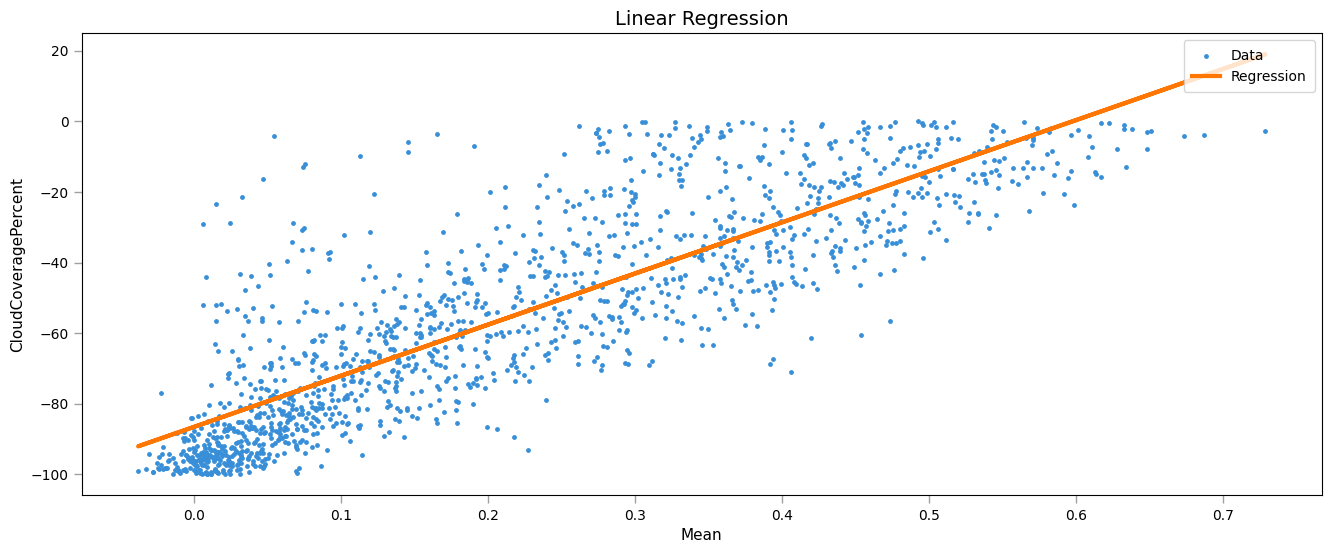

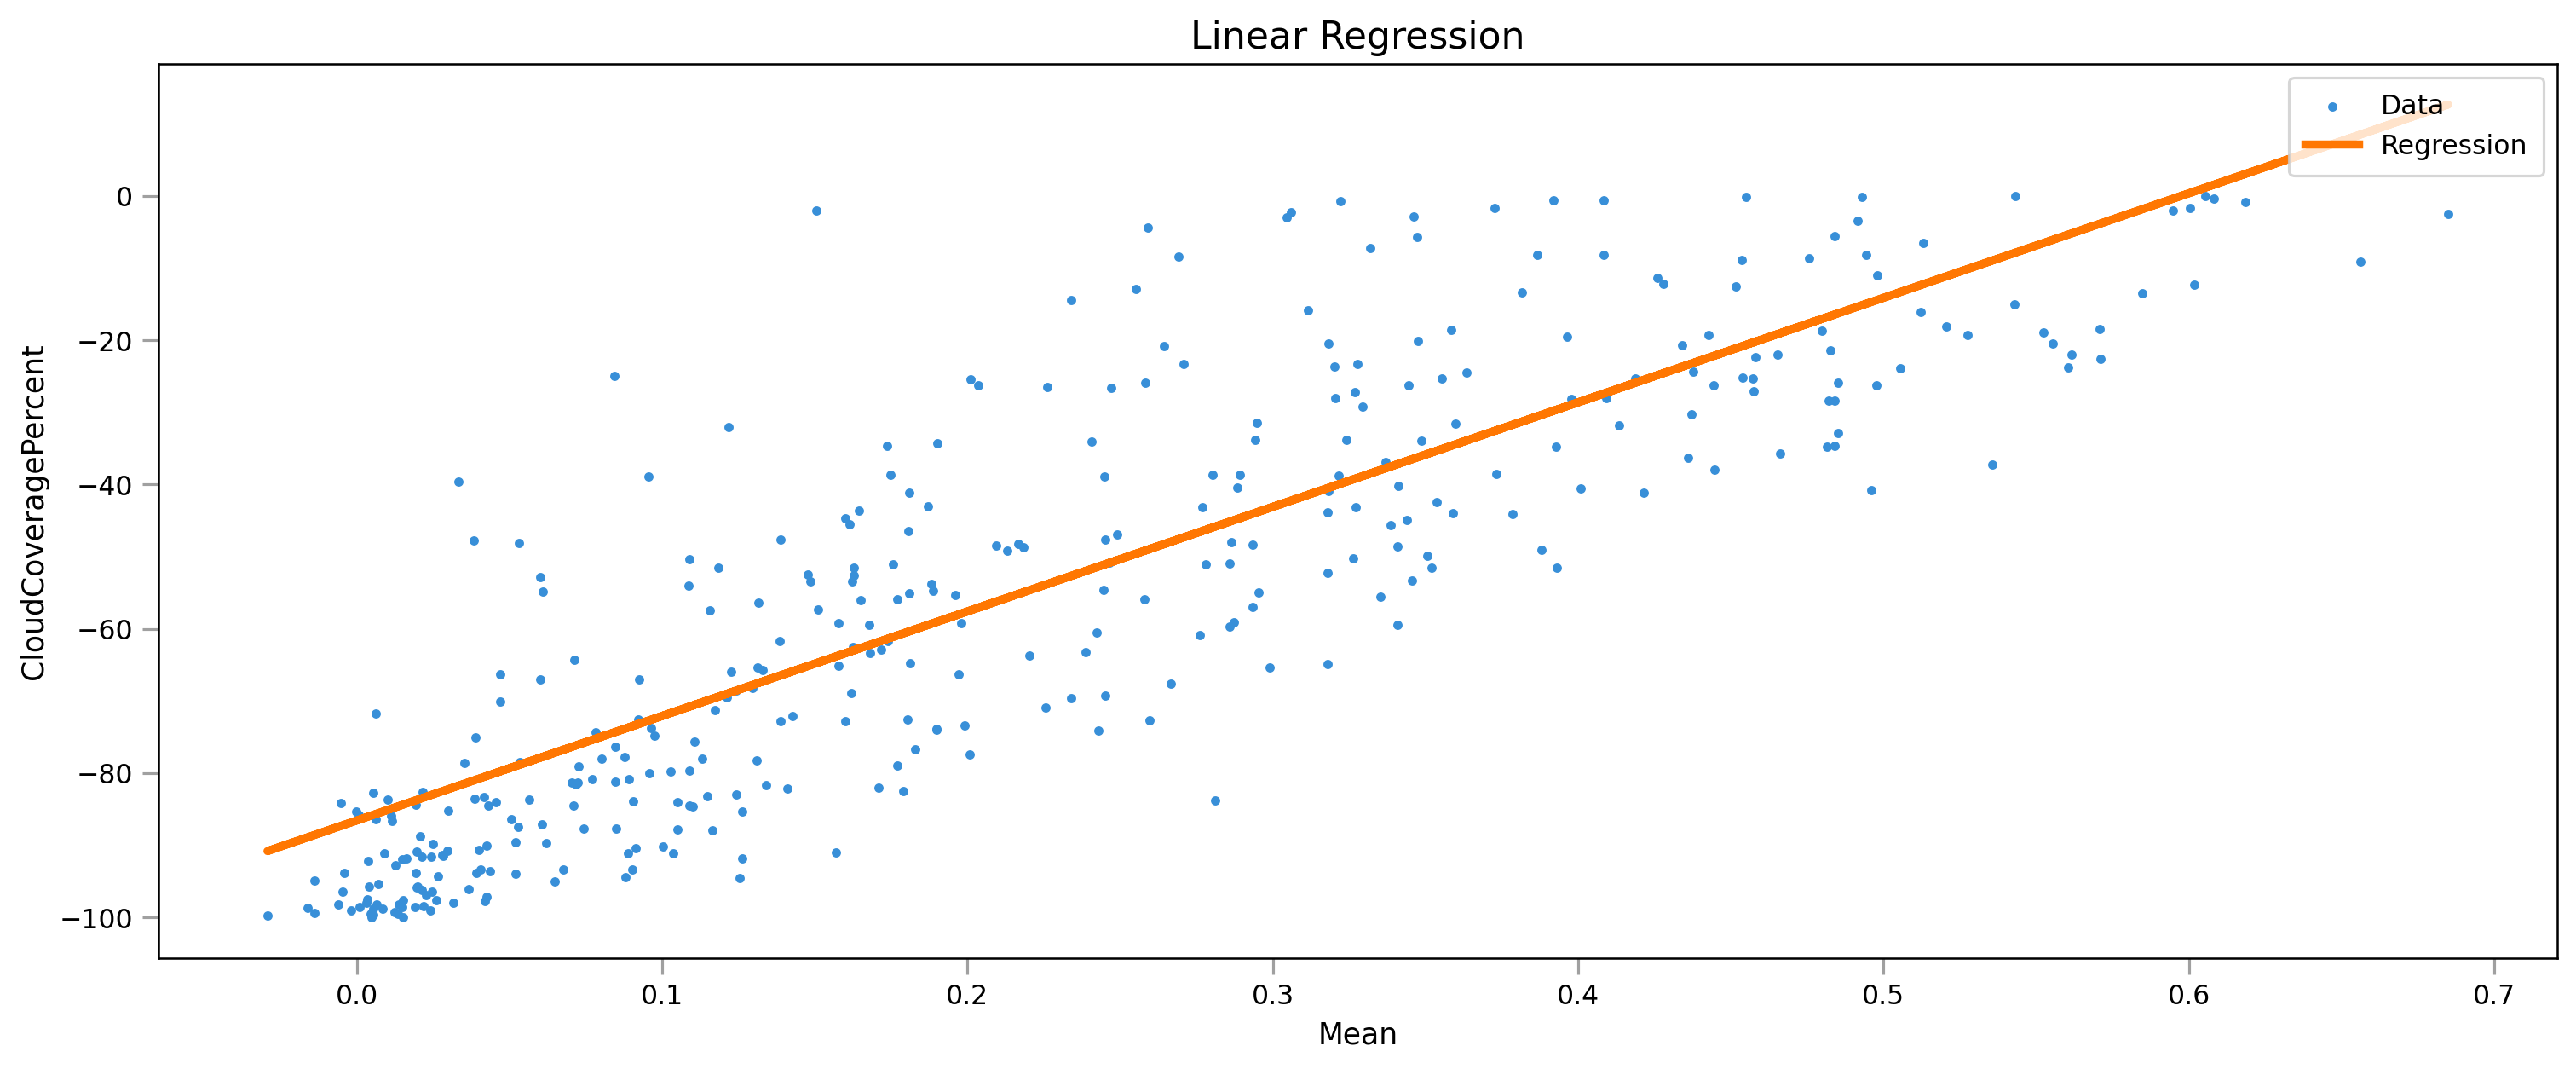

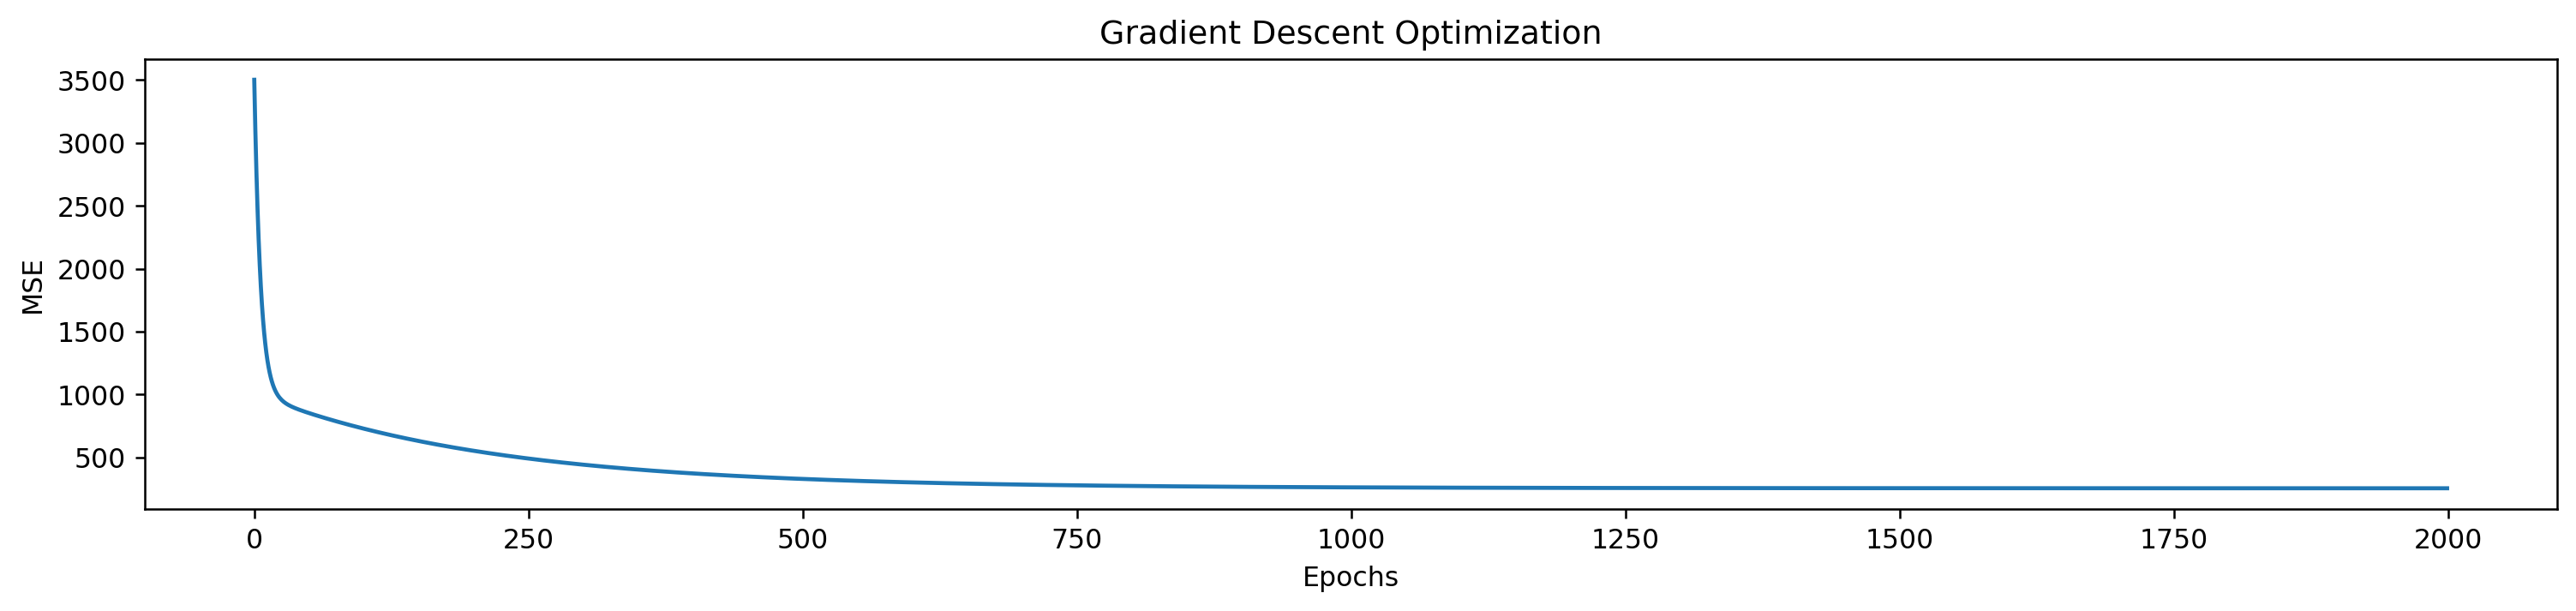

In [30]:
y_pred = m*X_train + c

plot_regression(X_train, Y_train, y_pred, title="Linear Regression")
plot_regression(X_test, Y_test,  m*X_test + c, title="Linear Regression")
plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [31]:
def r_squared(y,y_pred):
        y_mean = np.full((len(y)), np.mean(y))
        err_reg = sum((y - y_pred)**2)
        err_y_mean = sum((y - y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [32]:
r_squared(Y_test,m*X_test + c)

0.7379404539810954

In [33]:
r_squared(Y_train,m*X_train + c)

0.7190966036750162

In [34]:
y_test_pred = m*X_test + c
df_comp = pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})

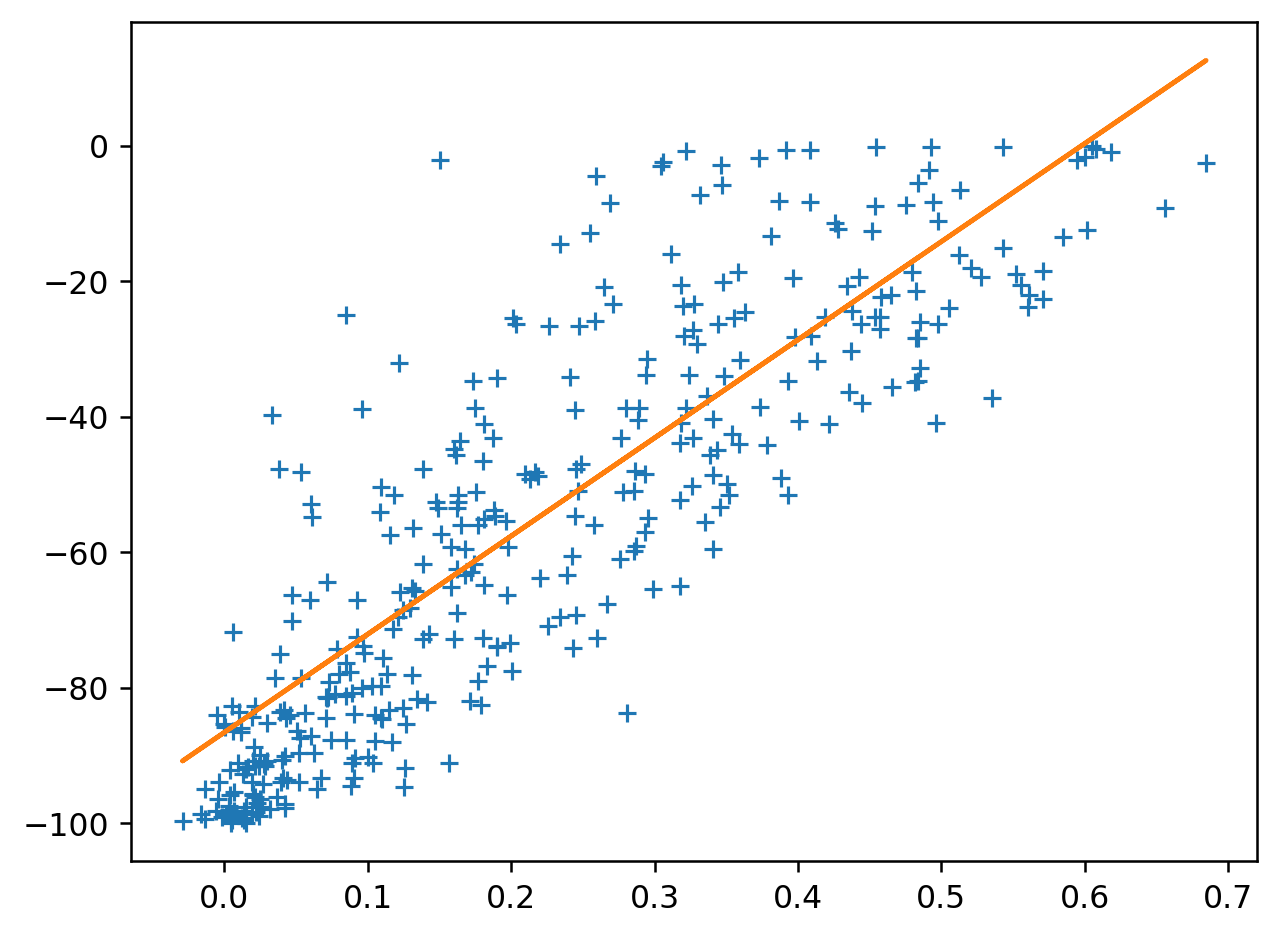

In [35]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    plt.plot(X_test, df_comp['Actual'], '+', label='Actual values')
    plt.plot(X_test, df_comp['Predicted'], label='Predicted values')
    
    plt.show()

compare_plot(df_comp)